<a href="https://colab.research.google.com/github/PARULCHUTANIPC/parul/blob/p1/fmnist_d7.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
torch.set_printoptions(linewidth= 120)
torch.set_grad_enabled(True)
from torch.utils.tensorboard import SummaryWriter

In [0]:

def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=2)
        
        self.fc1 = nn.Linear(in_features=12 * 6 * 6, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # implement the forward pass
        # 1) Input layer
        t=t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 6 * 6)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # 6) Output Layer
        t = self.out(t)
#t = F.softmax(t, dim=1)

        return t

In [0]:
transform = transform=transforms.Compose([
        transforms.ToTensor()
    ])
train_set = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)

test_set = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=100,
                                         shuffle=False)

In [40]:
'''
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
'''

"\ntrain_set = torchvision.datasets.FashionMNIST(\n    root='./data'\n    ,train=True\n    ,download=True\n    ,transform=transforms.Compose([\n        transforms.ToTensor()\n    ])\n)\n"

# TRAINING WITH A SINGLE BATCH

In [0]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set
   ,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr = 0.01)
# Obtain the batch 
batch = next(iter(train_loader))
images, labels = batch
# PASS THE BATCH IN THE NETWORK  --------  network is the name of the class we made..... in which we defined the layers, 1 input, 2 conv, 2 linear and 1 output layer
preds = network(images)
#CALCULATE LOSS
loss = F.cross_entropy(preds, labels)
# CALCULATE GRADIENTS
loss.backward()
# UPDATE WEIGHTS
optimizer.step()

In [33]:
print ('loss1 : ', loss.item()) # it will give the loss when the images are given to the network  first time
# Now, the images are again passed to the network and calculate the loss again and compare
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2 : ', loss.item())

loss1 :  2.3137307167053223
loss2 :  2.286214590072632


**# TRAINING WITH ALL BATCHES / ONE EPOCH**

In [0]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set
   ,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr = 0.01)
# THIS IS THE SAME AS TRAINING A SINGLE BATCH. IN ADDITION TO THAT , WE HAVE TO APPLY A LOOP SO THAT ALL BATCHES CAN PASS THROUGH THE NETWORK TO GET TRAINED
#####---------------------------
total_loss= 0
total_correct = 0
# Obtain the batch 
#batch = next(iter(train_loader))
#images, labels = batch
# SELECTING ALL BATCHES
for batch in train_loader:
# PASS THE BATCH IN THE NETWORK  --------  network is the name of the class we made..... in which we defined the layers, 1 input, 2 conv, 2 linear and 1 output layer
  preds = network(images)
#CALCULATE LOSS
  loss = F.cross_entropy(preds, labels)
# -------------------- EXTRA LINE ---- SET THE INITIAL GRADIENT ZERO AFTER EVERY ITERATION, OTHERWISE IT WILL ADD UP THE WEIGHT AFTER EVERY STEP WHICH WILL ULTIMATELY RESULT IN BAD ACCURACY, HIGHER LOSS
  optimizer.zero_grad()
# CALCULATE GRADIENTS
  loss.backward()
# UPDATE WEIGHTS  
  optimizer.step()
  ##----------- Now, add the loss calculated  and the correct predictions done for every batches
  total_correct+= get_num_correct(preds, labels)
  total_loss+= loss.item()

In [0]:
print("epoch : ", 0, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
accuracy = total_correct/len(train_set)
print ("Accuracy : ", accuracy)

epoch :  0 Correct Predictions :  58725    Total_Loss :  35.00880929910363
Accuracy :  0.97875


# TRAIN THE IMAGES MULTIPLE TIMES / multiple epochs

In [41]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set
   ,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr = 0.01)
# Obtain the batch 
batch = next(iter(train_loader))
images, labels = batch
'''
################ ADDING THE TENSORBOARD  ########&&&&&&&&&&&&&&&&&&&&&
grid = torchvision.utils.make_grid(images)
tb= SummaryWriter()
tb.add_image('images', grid)
tb.add_graph(network, images)
'''
######################            CREATE A LOOOPPPPPPP ##########################################
for epoch in range(5):
# THIS IS THE SAME AS TRAINING A SINGLE BATCH. EXCEPT TO THAT , WE HAVE TO APPLY A LOOP SO THAT ALL BATCHES CAN PASS THROUGH THE NETWORK TO GET TRAINED
#####---------------------------
  total_loss= 0
  total_correct = 0
# SELECTING ALL BATCHES
  for batch in train_loader:
# PASS THE BATCH IN THE NETWORK  --------  network is the name of the class we made..... in which we defined the layers, 1 input, 2 conv, 2 linear and 1 output layer
    preds = network(images)
#CALCULATE LOSS
    loss = F.cross_entropy(preds, labels)
# -------------------- EXTRA LINE ---- SET THE INITIAL GRADIENT ZERO AFTER EVERY ITERATION, OTHERWISE IT WILL ADD UP THE WEIGHT AFTER EVERY STEP WHICH WILL ULTIMATELY RESULT IN BAD ACCURACY, HIGHER LOSS
    optimizer.zero_grad()
# CALCULATE GRADIENTS
    loss.backward()
# UPDATE WEIGHTS  
    optimizer.step()
  ##----------- Now, add the loss calculated  and the correct predictions done for every batches
    total_correct+= get_num_correct(preds, labels)
    total_loss+= loss.item()
    print("epoch : ", epoch, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
'''
###-------------------ADDING THE TENSORBOARD--------------------------------
  tb.add_scalar('Loss', total_loss, epoch)
  tb.add_scalar('Correct Predictions', total_correct, epoch)
  tb.add_scalar('Accuracy', total_correct/len(train_set), epoch)
  tb.add_histogram('Conv1.bias', network.conv1.bias, epoch)
  tb.add_histogram('Conv1.weight', network.conv1.weight, epoch)
  tb.add_histogram('Conv1.weight.grad', network.conv1.weight.grad, epoch)

'''
  #print("epoch : ", epoch, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
#tb.close()

epoch :  0 Correct Predictions :  10    Total_Loss :  2.305696487426758
epoch :  0 Correct Predictions :  25    Total_Loss :  4.573457956314087
epoch :  0 Correct Predictions :  37    Total_Loss :  6.816771984100342
epoch :  0 Correct Predictions :  52    Total_Loss :  8.992369890213013
epoch :  0 Correct Predictions :  76    Total_Loss :  11.074150800704956
epoch :  0 Correct Predictions :  106    Total_Loss :  13.002421617507935
epoch :  0 Correct Predictions :  138    Total_Loss :  14.746877670288086
epoch :  0 Correct Predictions :  178    Total_Loss :  16.282329320907593
epoch :  0 Correct Predictions :  227    Total_Loss :  17.632030248641968
epoch :  0 Correct Predictions :  273    Total_Loss :  18.835718870162964
epoch :  0 Correct Predictions :  324    Total_Loss :  20.033887028694153
epoch :  0 Correct Predictions :  378    Total_Loss :  21.098228216171265
epoch :  0 Correct Predictions :  439    Total_Loss :  22.032284557819366
epoch :  0 Correct Predictions :  500    Total_

"\n###-------------------ADDING THE TENSORBOARD--------------------------------\n  tb.add_scalar('Loss', total_loss, epoch)\n  tb.add_scalar('Correct Predictions', total_correct, epoch)\n  tb.add_scalar('Accuracy', total_correct/len(train_set), epoch)\n  tb.add_histogram('Conv1.bias', network.conv1.bias, epoch)\n  tb.add_histogram('Conv1.weight', network.conv1.weight, epoch)\n  tb.add_histogram('Conv1.weight.grad', network.conv1.weight.grad, epoch)\n\n"

In [42]:
#print("epoch : ", epoch, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
accuracy = total_correct/len(train_set)
print ("Accuracy : ", accuracy*100,"%")

Accuracy :  100.0 %


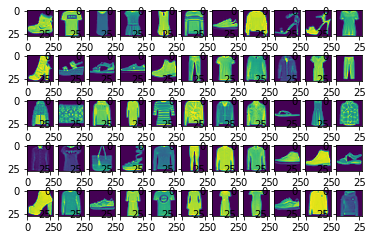

In [0]:
#plt.(20,20)
import matplotlib.pyplot as plt
for i in range(55):
    plt.subplot(5,11,i+1)
    plt.imshow(images[i].squeeze())
plt.show()

#ANALYZING CNN RESULTS / CONFUSION MATRIX

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
#from resources.plotcm import plot_confusion_matrix

In [0]:
# collecting maximum values from a batch
#-----------------------------------------------------------
try1 = []
for u in preds:
  try1.append(u.argmax(dim=0).tolist())
len(try1)

100

In [0]:
# COLLECTING ALL PREDICTED VALUES ------------BATCHWISE
try1 = []
for batch in train_loader:
  for u in preds:
    try1.append(u.argmax(dim=0).tolist())
len(try1)

60000

In [0]:
# COLLECTING ALL LABELLED VALUES ------------BATCHWISE
try2 = []
for batch in train_loader:
  for uu in labels:
    try2.append(uu.tolist())
len(try2)

60000

In [0]:
cm = confusion_matrix(try2, try1)
#print(type(cm))
#cm.dtype
cm

array([[7200,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6600,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5400,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 9000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5400,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 6600,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 6000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4800,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 2400,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 6600]])

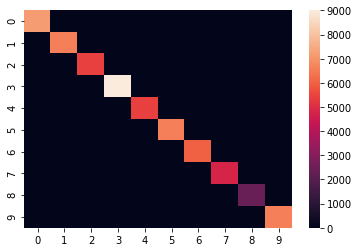

In [0]:
sns.heatmap(data = cm)

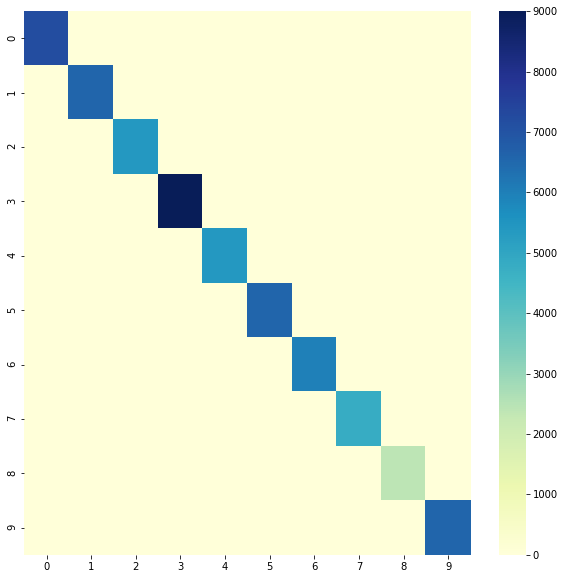

In [0]:
 names = (
    'T-shirt/top'
    ,'Trouser'
    ,'Pullover'
    ,'Dress'
    ,'Coat'
    ,'Sandal'
    ,'Shirt'
    ,'Sneaker'
    ,'Bag'
    ,'Ankle boot'
)
plt.figure(figsize=(10,10))
#plt.plot(data = cm)
sns.heatmap(cm, cmap ="YlGnBu")
#plot_confusion_matrix(datacm, names)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(try1, try2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7200
           1       1.00      1.00      1.00      6600
           2       1.00      1.00      1.00      5400
           3       1.00      1.00      1.00      9000
           4       1.00      1.00      1.00      5400
           5       1.00      1.00      1.00      6600
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      4800
           8       1.00      1.00      1.00      2400
           9       1.00      1.00      1.00      6600

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



**WORKING ON TEST DATA**

In [43]:
with torch.no_grad():
  batcht = next(iter(test_loader))
  imagest, labelst = batcht
  total_losst= 0
  total_correctt = 0
  for batch in test_loader:
    predst = network(imagest)
    losst = F.cross_entropy(predst, labelst)
    total_correctt+= get_num_correct(predst, labelst)
    total_losst+= losst.item()
    print( "Correct Predictions : ", total_correctt, "Total_Loss : ", total_losst)
#print("epoch : ", epoch, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
accuracyt = total_correctt/len(test_set)
print ("Accuracy : ", accuracyt*100,"%")

Correct Predictions :  71 Total_Loss :  4.674223899841309
Correct Predictions :  142 Total_Loss :  9.348447799682617
Correct Predictions :  213 Total_Loss :  14.022671699523926
Correct Predictions :  284 Total_Loss :  18.696895599365234
Correct Predictions :  355 Total_Loss :  23.371119499206543
Correct Predictions :  426 Total_Loss :  28.04534339904785
Correct Predictions :  497 Total_Loss :  32.71956729888916
Correct Predictions :  568 Total_Loss :  37.39379119873047
Correct Predictions :  639 Total_Loss :  42.06801509857178
Correct Predictions :  710 Total_Loss :  46.742238998413086
Correct Predictions :  781 Total_Loss :  51.416462898254395
Correct Predictions :  852 Total_Loss :  56.0906867980957
Correct Predictions :  923 Total_Loss :  60.76491069793701
Correct Predictions :  994 Total_Loss :  65.43913459777832
Correct Predictions :  1065 Total_Loss :  70.11335849761963
Correct Predictions :  1136 Total_Loss :  74.78758239746094
Correct Predictions :  1207 Total_Loss :  79.461806

In [0]:
def get_num_correct_test(preds_test, labels_test):
  return preds_test.argmax(dim=1).eq(labels_test).sum().item()

In [0]:
total_correct_test+= get_num_correct(preds_test, labels_test)
total_loss_test+= loss_test.item()

In [0]:
print("Correct Predictions : ", total_correct_test, "   Total_Loss : ", total_loss_test)
accuracy_test = total_correct_test/len(test_dataset)
print ("Accuracy : ", accuracy_test)

In [0]:
# COLLECTING ALL LABELLED VALUES of test data ------------BATCHWISE
try4 = []
for batch in test_loader:
  for uu in labels_test:
    try4.append(uu.tolist())
len(try4)

In [0]:
# COLLECTING ALL predicted VALUES of test data ------------BATCHWISE
try3 = []
for batch in test_loader:
  for u in predicted:
    try3.append(u.argmax(dim=0).tolist())
len(try3)

In [0]:
cm_test = confusion_matrix(try4, try3)

In [0]:
cm_test

In [0]:
print(classification_report(try3, try4))

Accuracy :  69.0 %


In [0]:
batch_size_list = [100, 1000, 10000]
lr_list = [.01, .001, .0001, .00001]

In [0]:
for batch_size in batch_size_list:
    for lr in lr_list:
        network = Network()

        train_loader = torch.utils.data.DataLoader(
            train_set, batch_size=batch_size
        )
        optimizer = optim.Adam(
            network.parameters(), lr=lr
        )

        images, labels = next(iter(train_loader))
        grid = torchvision.utils.make_grid(images)

        comment=f' batch_size={batch_size} lr={lr}'
        tb = SummaryWriter(comment=comment)
        tb.add_image('images', grid)
        tb.add_graph(network, images)

        for epoch in range(5):
            total_loss = 0
            total_correct = 0
            for batch in train_loader:
                images, labels = batch # Get Batch
                preds = network(images) # Pass Batch
                loss = F.cross_entropy(preds, labels) # Calculate Loss
                optimizer.zero_grad() # Zero Gradients
                loss.backward() # Calculate Gradients
                optimizer.step() # Update Weights

                total_loss += loss.item() * batch_size
                total_correct += get_num_correct(preds, labels)

            tb.add_scalar(
                'Loss', total_loss, epoch
            )
            tb.add_scalar(
                'Number Correct', total_correct, epoch
            )
            tb.add_scalar(
                'Accuracy', total_correct / len(train_set), epoch
            )

            for name, param in network.named_parameters():
                tb.add_histogram(name, param, epoch)
                tb.add_histogram(f'{name}.grad', param.grad, epoch)

            print(
                "epoch", epoch
                ,"total_correct:", total_correct
                ,"loss:", total_loss
            )  
        tb.close()

In [6]:
batch_size_list = [100, 1000, 10000]
lr_list = [.01, .001, .0001, .00001]
for batch_size in batch_size_list:
    for lr in lr_list:
      network = Network()
      train_loader = torch.utils.data.DataLoader(train_set ,batch_size=100)
      optimizer = optim.Adam(network.parameters(),lr = 0.01)
      batch = next(iter(train_loader))
      images, labels = batch
      for epoch in range(5):                        
        total_loss= 0
        total_correct = 0
        for batch in train_loader:
          preds = network(images)                   
          loss = F.cross_entropy(preds, labels)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
      
          total_correct+= get_num_correct(preds, labels)
          total_loss+= loss.item()
          print("epoch : ", epoch, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)


epoch :  0 Correct Predictions :  9    Total_Loss :  2.312483549118042
epoch :  0 Correct Predictions :  24    Total_Loss :  4.602251052856445
epoch :  0 Correct Predictions :  39    Total_Loss :  6.8545897006988525
epoch :  0 Correct Predictions :  54    Total_Loss :  9.043526887893677
epoch :  0 Correct Predictions :  77    Total_Loss :  11.138766527175903
epoch :  0 Correct Predictions :  103    Total_Loss :  13.094977259635925
epoch :  0 Correct Predictions :  128    Total_Loss :  14.89358937740326
epoch :  0 Correct Predictions :  169    Total_Loss :  16.5714271068573
epoch :  0 Correct Predictions :  217    Total_Loss :  18.00859534740448
epoch :  0 Correct Predictions :  262    Total_Loss :  19.3998886346817
epoch :  0 Correct Predictions :  305    Total_Loss :  20.807249903678894
epoch :  0 Correct Predictions :  353    Total_Loss :  22.13195312023163
epoch :  0 Correct Predictions :  411    Total_Loss :  23.200494050979614
epoch :  0 Correct Predictions :  470    Total_Loss : 

KeyboardInterrupt: ignored

In [0]:
#print("epoch : ", epoch, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
accuracy = total_correct/len(train_set)
print ("Accuracy : ", accuracy*100,"%")

In [0]:
parameters = dict(
    lr = [.01, .001]
    ,batch_size = [100, 1000]
    ,shuffle = [True, False]
)

In [8]:
param_values = [v for v in parameters.values()]
param_values

[[0.01, 0.001], [100, 1000], [True, False]]

In [9]:
for lr, batch_size, shuffle in product(*param_values): 
    print (lr, batch_size, shuffle)

NameError: ignored

In [0]:

layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [1]:

layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

NameError: ignored

In [8]:
import matplotlib.pyplot as plt
plt.imshow(torchvision.utils.make_grid(images))

NameError: ignored